# Unmixing signals with ICA

Unmixing sound signals is an example of cocktail party problem you are going to use for getting hands-on experience with ICA. You have 5 mixed sound sources in **mixed** folder (go check them out). Your goal is to unmix them.

In [1]:
import scipy.io.wavfile
import numpy as np

### Loading data from WAV files

Loading data from WAV files

In [2]:
dataset = []
for i in range(1,6):
    sample_rate, wav_data = scipy.io.wavfile.read('mixed/mix'+str(i)+'.wav')
    dataset.append(wav_data)

dataset = np.array(dataset).T
print(dataset.shape)
print(dataset[:10,:])

(53442, 5)
[[ 343 -546 -327 -275  612]
 [ 627 -840 -579 -124  890]
 [ 589 -725 -491 -115  989]
 [ 712 -887 -571  -24 1111]
 [ 589 -725 -491 -115  989]
 [ 268 -462 -146 -236  678]
 [ 107 -330   27 -296  522]
 [-214  -67  372 -416  211]
 [-214  -67  372 -416  211]
 [ 159 -206  -26 -233  445]]


Normalizing data

In [3]:
maxs = np.max(np.abs(dataset), axis=0).astype(np.int64)
data_normalized = 0.99 * dataset / maxs;
print(data_normalized[:10,:])

[[ 0.01046796 -0.01666328 -0.00997965 -0.00839268  0.01867752]
 [ 0.0191353  -0.02563581 -0.0176704  -0.00378433  0.02716175]
 [ 0.01797558 -0.02212614 -0.01498474 -0.00350966  0.03018311]
 [ 0.0217294  -0.02707019 -0.01742625 -0.00073245  0.03390641]
 [ 0.01797558 -0.02212614 -0.01498474 -0.00350966  0.03018311]
 [ 0.00817904 -0.01409969 -0.00445575 -0.00720244  0.02069176]
 [ 0.00326551 -0.01007121  0.00082401 -0.00903357  0.01593082]
 [-0.00653103 -0.00204476  0.011353   -0.01269583  0.00643947]
 [-0.00653103 -0.00204476  0.011353   -0.01269583  0.00643947]
 [ 0.00485249 -0.00628688 -0.00079349 -0.00711089  0.01358087]]


### Implementing ICA

Initializing unmixing matrix $ W $.

In [54]:
W = np.identity(5)

Implement learning unmixing matrix $ W $ with ICA.

In [75]:
# =============== TODO: Your code here ===============
# Implement learning unmixing matrix W with ICA. Do not forget to account for the dimensionality.
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def learn_w(X):
    # algorithm to learn matrix W
    alpha = 0.01
    eps = 0.01
    m, n = X.shape
    loss_history = []
    W = np.identity(n)
    
    for iteration in range(100): 
        W_old = W.copy()
        for x_i in X:
            gradient = 1 - 2 * sigmoid(np.dot(W, x_i))
            W += alpha*(np.outer(gradient, x_i) + np.linalg.inv(W.T))    
        loss = np.linalg.norm(W - W_old)
        print("Iteration: {0} Norm(W-W_old): {1:0.3f}".format(iteration, loss))
        loss_history.append(loss)
        if len(loss_history)>2 and abs(loss_history[-1]-loss_history[-2]) < eps:
            print("Algorithm converged. W found. Stop early.")
            break
    return W, loss_history

W, loss_history  = learn_w(data_normalized)
# ================="===================================

Iteration: 0 Norm(W-W_old): 47.959
Iteration: 1 Norm(W-W_old): 13.114
Iteration: 2 Norm(W-W_old): 8.086
Iteration: 3 Norm(W-W_old): 5.951
Iteration: 4 Norm(W-W_old): 4.816
Iteration: 5 Norm(W-W_old): 4.078
Iteration: 6 Norm(W-W_old): 3.505
Iteration: 7 Norm(W-W_old): 3.028
Iteration: 8 Norm(W-W_old): 2.623
Iteration: 9 Norm(W-W_old): 2.278
Iteration: 10 Norm(W-W_old): 1.981
Iteration: 11 Norm(W-W_old): 1.727
Iteration: 12 Norm(W-W_old): 1.509
Iteration: 13 Norm(W-W_old): 1.323
Iteration: 14 Norm(W-W_old): 1.165
Iteration: 15 Norm(W-W_old): 1.031
Iteration: 16 Norm(W-W_old): 0.917
Iteration: 17 Norm(W-W_old): 0.820
Iteration: 18 Norm(W-W_old): 0.738
Iteration: 19 Norm(W-W_old): 0.667
Iteration: 20 Norm(W-W_old): 0.607
Iteration: 21 Norm(W-W_old): 0.556
Iteration: 22 Norm(W-W_old): 0.511
Iteration: 23 Norm(W-W_old): 0.473
Iteration: 24 Norm(W-W_old): 0.440
Iteration: 25 Norm(W-W_old): 0.410
Iteration: 26 Norm(W-W_old): 0.384
Iteration: 27 Norm(W-W_old): 0.361
Iteration: 28 Norm(W-W_old):

In [76]:
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print("Learned W with Gradient Descent:\n\n", W)

Learned W with Gradient Descent:

 [[ 63.481  18.885  25.169 -9.446 -15.008]
 [ 11.067  23.965 -4.568 -17.397  7.733]
 [ 14.394 -6.718  26.002  12.145 -13.134]
 [-7.034  2.182 -5.651  9.986 -1.679]
 [-3.244  17.277  12.524  8.894  27.609]]


In [66]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0,0.5,'norm')

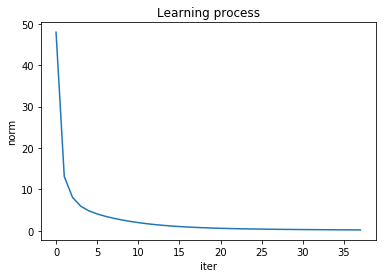

In [77]:
plt.plot(range(len(loss_history)), loss_history)
plt.title("Learning process")
plt.xlabel("iter")
plt.ylabel("norm")

### Unmixing sounds

Use learned matrix $ W $ to unmix the sounds into separate data sources. Make sure you represent the resulting unmixing matrix in a way so that each row is a separate track (i.e. the matrix should have 5 rows).

In [78]:
# =============== TODO: Your code here ===============
# Use learned matrix W to unmix the sounds into separate data sources.

unmixed = W.dot(data_normalized.transpose())

# ====================================================

Saving unmixed sounds. Please note that some players may not support the resulting WAV format. If that is the case, you can use Winamp to play the unmixed sounds.

In [79]:
# maxs = np.max(np.abs(unmixed), axis=0)
# unmixed_normalized = 0.99 * unmixed / maxs
maxs = np.max(np.abs(unmixed), axis=1)
unmixed_normalized = 0.99 * unmixed / maxs[:,None]


for i in range(unmixed_normalized.shape[0]):
    track = unmixed_normalized[i,:]
    scipy.io.wavfile.write('unmixed/unmixed'+str(i)+'.wav', sample_rate, track)